### 911 Call Analysis
by Domas Budrys, Faith Sang, and Casey Martin

# Big Question 1: How does the usage of 911 change over time?

In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
import collections
import datetime as dt
import re
from operator import itemgetter
from scipy.misc import imread

## Date range in 911_calls_for_service.csv

* Start: 2015-01-01
* End: 2017-08-29

In [2]:
data=pd.read_csv("911_calls_for_service.csv")
#print(len(data))

#convert date column to datetime type. errors='coerce' stored empty values as NaT
data['callDateTime'] = pd.to_datetime(data['callDateTime'], errors='coerce')

data['callDateTime'] is formatted to *pandas.Timestamp* type which allows us to manipulate data ranges as needed 

## Sub-Question 1: Has the frequency changed over the past three years?

In [3]:
#Question 1
def pieChart(begin_year, end_year):

    begin_year_string = str(begin_year) + '-01-01'
    end_year_string = str(end_year) + '-01-01'
    
    date_mark1 = pd.to_datetime(begin_year_string, format='%Y-%m-%d')
    date_mark2 = pd.to_datetime(end_year_string, format='%Y-%m-%d')

    data_fixed = data[data['callDateTime'] >= date_mark1]
    data_fixed = data_fixed[data_fixed['callDateTime'] < date_mark2]

    #Get all the month names
    month_names = []
    for i in data_fixed['callDateTime']:
        m = i.strftime("%b")
        month_names.append(m)

    month_count = collections.Counter(month_names).most_common()
    #print(month_count.index())

    month_count_names =[names for names, values in month_count]
    month_count_values =[values for names, values in month_count]
    
    title_string = "Year: " + str(begin_year)

    
    pie_series = pd.Series(month_count_values, index= month_count, name="" )
    final_pie = pie_series.plot.pie(figsize=(10, 10), autopct='%.2f%%', 
                                    fontsize=12, colormap='Set3', shadow=True, title = title_string )
    return final_pie
    


Since 911_calls_for_service.csv file contains information stored between dates **2015-01-01 and 2017-08-29** we will be taking each moth from the years to display the frequency of 911 calls.

### Sub-Question 1 (Code Explanation)

We create the function called **pieChart** which takes in 2 parameters: *begin_year, end_year*. 
* begin_year - specifies the begining of the year which we would like to declare.
* end_year - specifies the end of the year which we would like to declare.

After function is executed, parameters are concataneted with "01-01" and stored as a string variables. Then, in order to set data range which the entered years will be used, we format string dates to *pandas.Timestamp* type. After applying the conditions to set establish the date range, then information is stored to the new DataFram **date_fixed** 
    
    date_mark1 = pd.to_datetime(begin_year_string, format='%Y-%m-%d', errors='coerce')
    date_mark2 = pd.to_datetime(end_year_string, format='%Y-%m-%d', errors='coerce')
    
    data_fixed = data[data['callDateTime'] >= date_mark1]
    data_fixed = data_fixed[data_fixed['callDateTime'] < date_mark2]

In order to provide a better visaulization of our data set, we will be retrieving month names instead of plain number. This can be achieved by `strftime("%b")` which is use in *for loop* to iterate through **date_fixed** DataFrame and store all month names to the list **month_names**. After, all the values in **month_names** are calculated by the using `collections.Counter(month_names).most_common()` and sotored to the list **month_count**. In order to create pie chart we will separate **month_count** to get separate values of counts and month names, which will follow the same order. This can be achieved by:

    month_count_names =[names for names, values in month_count]
    month_count_values =[values for names, values in month_count]
    
Finally, we create pd.Series called **pie_series** which stores the values of **month_count_values** and is indexed by **month_count**(this will display the names and total count of each section in the pie chart). In order to display and return the pie chart we create the variable **final_pie** and pass in all the neccessary arguments to help visualize it `final_pie = pie_series.plot.pie(figsize=(10, 10), autopct='%.2f%%', 
                                    fontsize=12, colormap='Set3', shadow=True, title = title_string )`


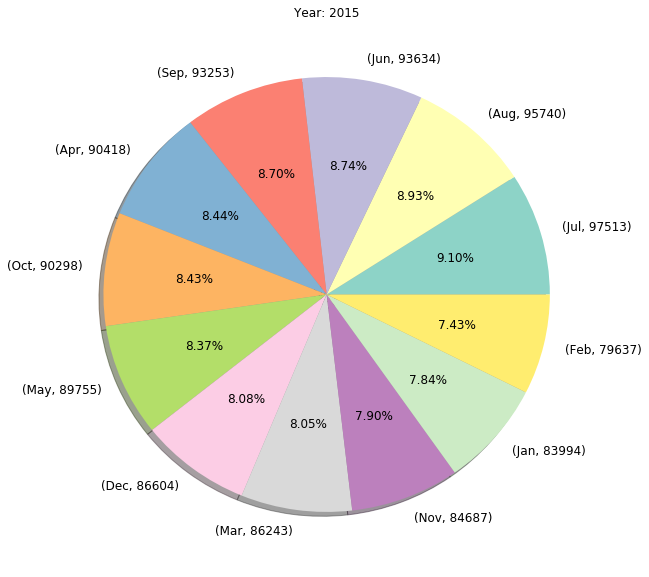

In [4]:
pieChart(2015, 2016)

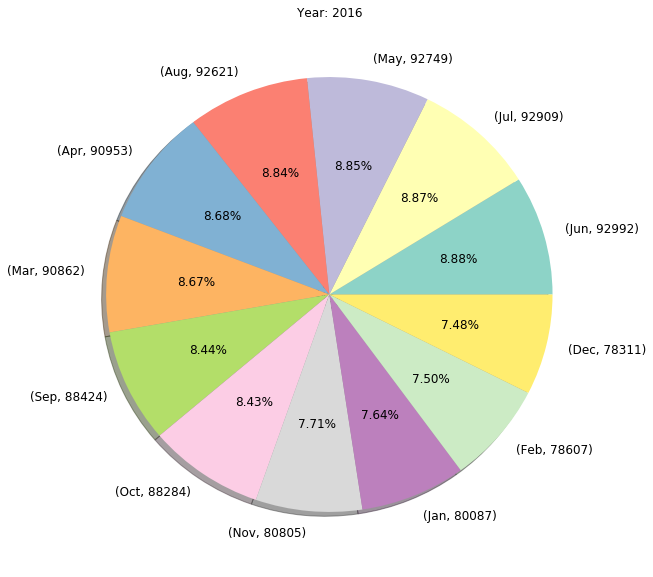

In [5]:
pieChart(2016, 2017)

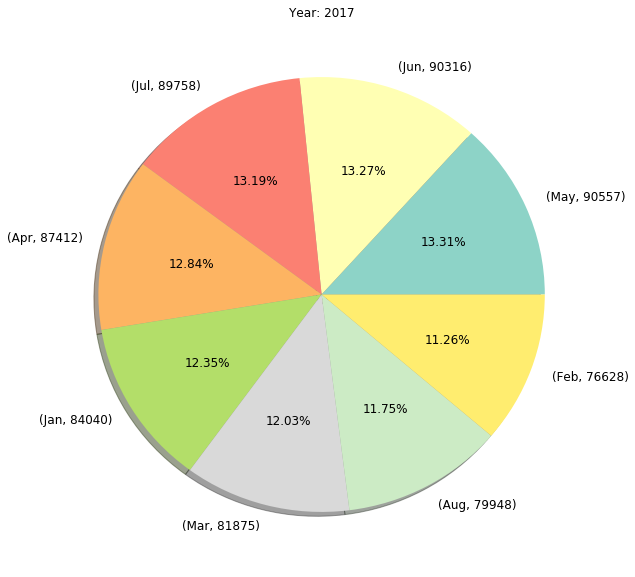

In [6]:
pieChart(2017, 2018)

## Sub-Question 2: Is the frequency of 911 calls seasonal? (more during the summer than winter?)

In [7]:
#Question 2
def yearPlot(begin_year, end_year):    
    
    begin_year_string = str(begin_year) + '-01-01'
    end_year_string = str(end_year) + '-01-01'

    date_mark1 = pd.to_datetime(begin_year_string, format='%Y-%m-%d', errors='coerce')
    date_mark2 = pd.to_datetime(end_year_string, format='%Y-%m-%d', errors='coerce')

    data_fixed = data[data['callDateTime'] >= date_mark1]
    #print(len(data))

    data_fixed = data_fixed[data_fixed['callDateTime'] < date_mark2]
    #print(len(data))

    #Get all the month names
    month_names = []
    for i in data_fixed['callDateTime']:
        m = i.strftime("%b")
        month_names.append(m)


    month_count = collections.Counter(month_names).most_common()
    #print(month_count.index())

    month_count_names =[names for names, values in month_count]
    month_count_values =[values for names, values in month_count]
    
    
    df = pd.DataFrame({
    "Month" : month_count_names,
    "Count": month_count_values
    })
    
    
    #Used to provide sorted values
    df['Month_idx'] = pd.DatetimeIndex(pd.to_datetime(df['Month'], format='%b')).month
    final_df = df.set_index('Month_idx').sort_index()

    return final_df
    


### Sub-Question 2 (Code Explanation)

We create the function called **yearPlot** which takes in 2 parameters: *begin_year, end_year*. 
* begin_year - specifies the begining of the year which we would like to declare.
* end_year - specifies the end of the year which we would like to declare.

After function is executed, parameters are concataneted with "01-01" and stored as a string variables. Then, in order to set data range which the entered years will be used, we format string dates to *pandas.Timestamp* type. After applying the conditions to set establish the date range, then information is stored to the new DataFram **date_fixed** 
    
    date_mark1 = pd.to_datetime(begin_year_string, format='%Y-%m-%d', errors='coerce')
    date_mark2 = pd.to_datetime(end_year_string, format='%Y-%m-%d', errors='coerce')
    
    data_fixed = data[data['callDateTime'] >= date_mark1]
    data_fixed = data_fixed[data_fixed['callDateTime'] < date_mark2]

In order to provide a better visaulization of our data set, we will be retrieving month names instead of plain number. This can be achieved by `strftime("%b")` which is use in *for loop* to iterate through **date_fixed** DataFrame and store all month names to the list **month_names**. After, all the values in **month_names** are calculated by the using `collections.Counter(month_names).most_common()` and sotored to the list **month_count**. In order to create pie chart we will separate **month_count** to get separate values of counts and month names, which will follow the same order. This can be achieved by:

    month_count_names =[names for names, values in month_count]
    month_count_values =[values for names, values in month_count]
    
Finally, we must change the order or month since they are ordered by their alphabetical value, instead of numeric. This can be achieved by `df['Month_idx'] = pd.DatetimeIndex(pd.to_datetime(df['Month'], format='%b')).month`. After months are sorted, we create new pd.DataFrame **final_df** which has the same values as **df** and manually set index to *df['Month_idx']*

Function **yearPlot** returns **final_df**

In [8]:
year_2015 = yearPlot(2015, 2016)
year_2016 = yearPlot(2016, 2017)
year_2017 = yearPlot(2017, 2018)


### Sub-Question 2 (Code Explanation)

Since **yearPlot** is returning **final_df** we must execute functions and assign them to such a variables as: **year_2015, year_2016, year_2017**

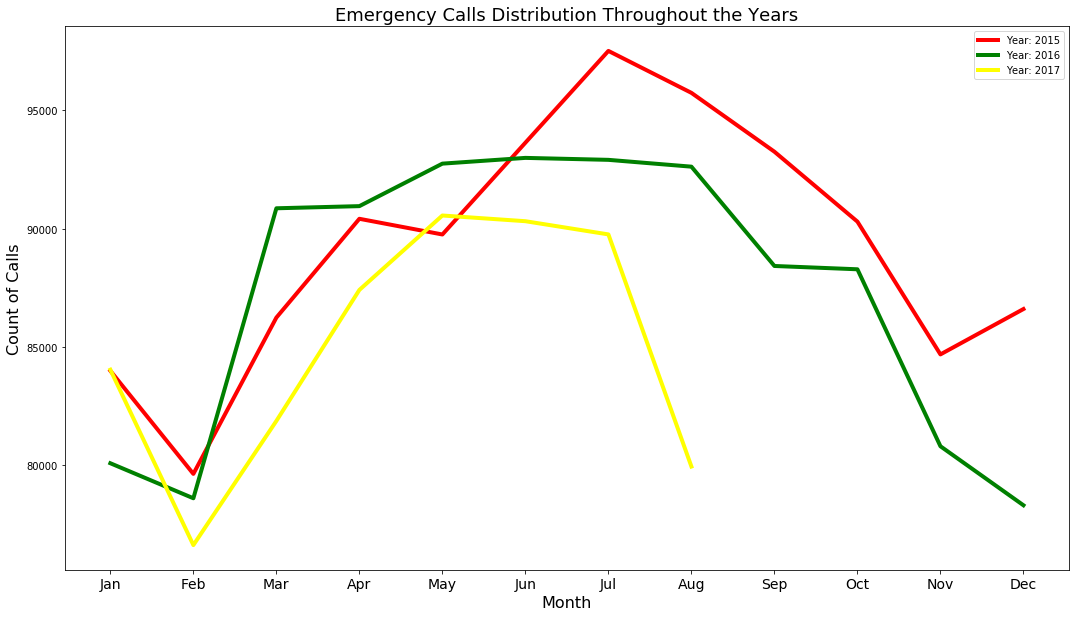

In [9]:
plt.figure(figsize=(18,10))
#Not able to use DataFrame


#Setting an array of monthly counts 
counts_2015 = np.array(year_2015['Count'])
counts_2016 = np.array(year_2016['Count'])
counts_2017 = np.array(year_2017['Count'])

#Setting an array of ordered months
month = np.array(year_2015["Month"])

plt.xticks(range(len(year_2015)), month, fontsize=14)
plt1, = plt.plot(counts_2015, color="red", linewidth=4.0)
plt2, = plt.plot(counts_2016, color="green", linewidth=4.0)
plt3, = plt.plot(counts_2017, color="yellow", linewidth=4.0)

#Setting up the legend
plt.legend([plt1, plt2, plt3], ['Year: 2015', 'Year: 2016', 'Year: 2017'])

plt.title('Emergency Calls Distribution Throughout the Years', fontsize=18)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Count of Calls', fontsize=16)


plt.show()

### Sub-Question 2 (Code Explanation)

In order to make a plot we will need **['Count']** values from each of the pd.DataFrame that we have created earlier. New lists are assign to variable names: **counts_2015, counts_2016, counts_2017**. 

To set up the plot we also must create a sorted of month names, this can be achieved by `month = np.array(year_2015["Month"])` We only need to create one list since all of the counts are sharing one plot.

Finally, we set up the plot, initialize lines and legend

## Sub-Question 3: Which days of the week emergency call center receives most calls?


In [5]:
def weekHeatmap (input_year):

    data_fixed = data[data.callDateTime.dt.year == input_year]

    df_date = pd.DataFrame({
        'callDateTime' : data_fixed['callDateTime'],
        'Week' : data_fixed['callDateTime'].dt.week,
        'Day_Name' : data_fixed['callDateTime'].dt.weekday_name,
        #'Day_Number' : data_fixed['callDateTime'].dt.dayofweek
    })

    df_date = df_date.sort_values(by=['callDateTime'])


    #Year 2016 return first week as week:53 
    if input_year == 2015:
        df_date['Week'] += 0
    elif input_year == 2016 or input_year == 2017:
        df_date['Week'] += 1

    #Check if any week of yaer is greater than the last week
    #First week in 2016 is 53 and last is 52
    lastWeek = df_date.iloc[-1].Week
    df_date.loc[df_date['Week'] > lastWeek, 'Week'] = 1


    #Used to sort Week days by numeric value 
    days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    category_day = pd.api.types.CategoricalDtype(categories=days, ordered=True)
    df_date['Day_Name'] = df_date['Day_Name'].astype(category_day)


    heatmap_df = df_date.groupby(['Week', 'Day_Name']).size().reset_index(name='Values')

    #Setting up plot
    plt.figure(figsize=(25,10))

    #Creates DataFrame table which stored values such as: index-WeekDay, columns-Week(1,2,3 .... 52, 53, values-Values)
    heatmap_display = heatmap_df.pivot_table(index='Day_Name', columns='Week', values='Values' )

    title_text = "Heatmap for 911 Call Count Throughout the Week (Year:" +str(input_year)+ ")"

    display=sns.heatmap(heatmap_display, linewidths=0.5, linecolor='black', cmap="magma")
    display.set_title(title_text, fontsize=24)
    display.set_ylabel('')
    display.set_xlabel('Weeks')
    display.tick_params(axis ='y', labelsize=14, labelrotation = 45)
    display.tick_params(axis ='x', labelsize=14)



### Sub-Question 3 (Code Explanation)

We create the function called **weekHeatmap** which takes in 1 parameters: *input_year*. 
* input_year - declare the year to create the heatmap

After function is executed, new pd.DataFrame **df_date** is created which stores values such as:
* callTimeDate - call time value which comes from original data set
* Week - the week ordinal of the year
* Day_Name - the name of the day in the week

Next, we sort values of the same DataFrame using command ` df_date.sort_values(by=['callDateTime'])`. Then, IF statement is create to determane if **input_year** is 2015, 2016, or 2017. The years of 2016 and 2017 calculate the value of first week as week 53, which is not correct. To fix this problem we add value of 1 to each week when these years are selected. Now, our DataFrame **df_date** will start at week 2 and end at week 54. Sinc ethe spot of week 1 is empty we are able to to change the value of week 54 to week 1.

    if input_year == 2015:
        df_date['Week'] += 0
    elif input_year == 2016 or input_year == 2017:
        df_date['Week'] += 1
    
    lastWeek = df_date.iloc[-1].Week
    df_date.loc[df_date['Week'] > lastWeek, 'Week'] = 1

In order to provide better visualization with our heatmap we must sort month based on their numeric value and not their alphabetical order. This can be achieved by:
    
    days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    category_day = pd.api.types.CategoricalDtype(categories=days, ordered=True)
    df_date['Day_Name'] = df_date['Day_Name'].astype(category_day)
    
After getting sorted value of month we can apply *groupby()* (similar to COUNT in SQL) which groups all the same values **Week and Day_Name** columns of our sorter pd.DataFrame **df_date**. New column with count values **Values** is created and information is assign to pd.DataFram **heatmap_df**

Then, we create spread-sheet style pd.DataFrame table using function *pivot_table()* which is used to collect the values for displaying heatmap `heatmap_display = heatmap_df.pivot_table(index='Day_Name', columns='Week', values='Values' )`

Finally, we create a heatmap **display** by passing in **heatmap_display** values and specify needed parameters

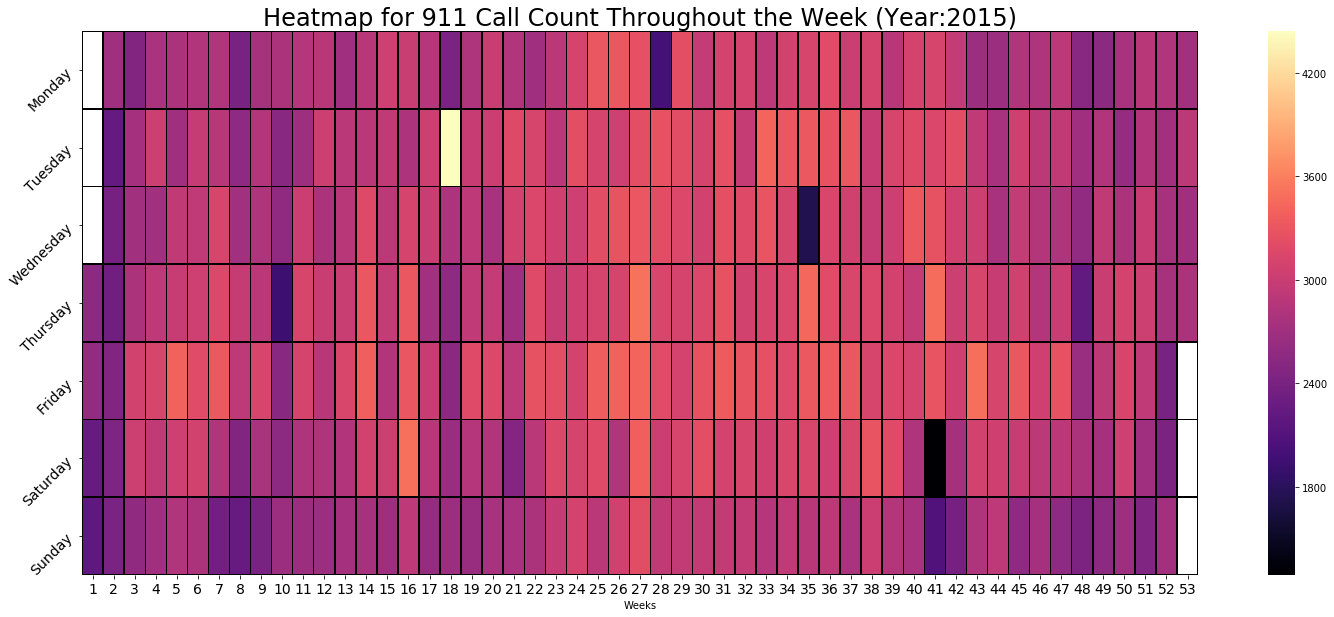

In [6]:
weekHeatmap(2015) 

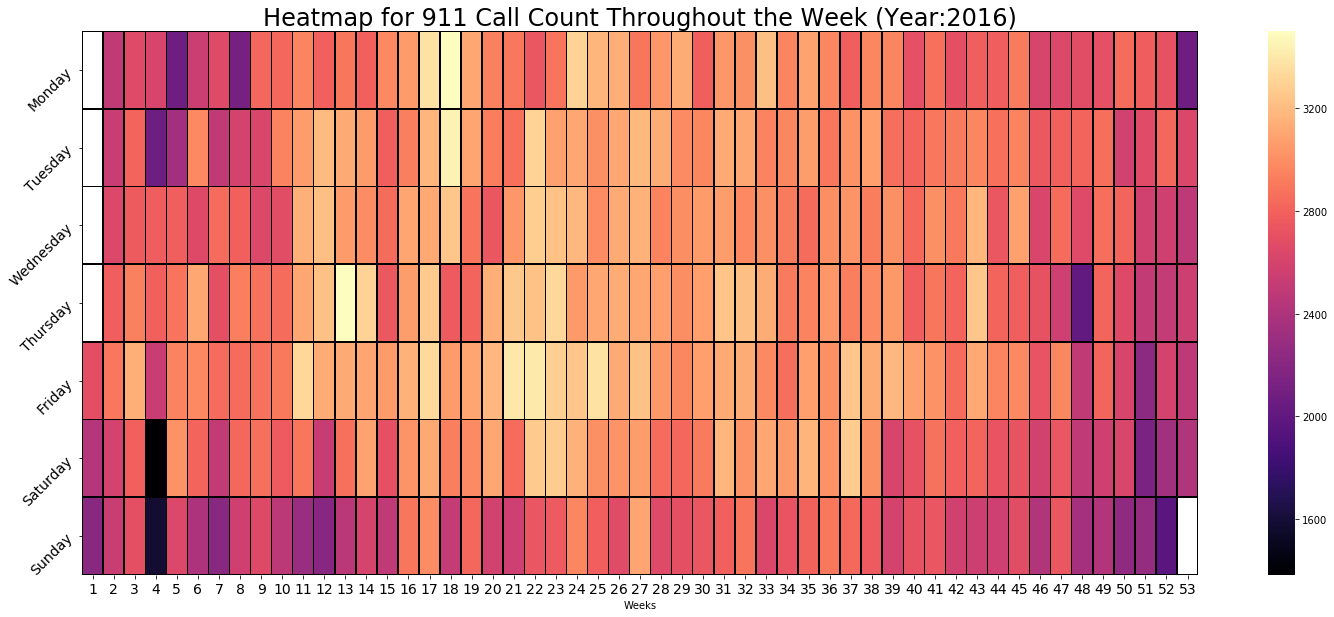

In [7]:
weekHeatmap(2016) 

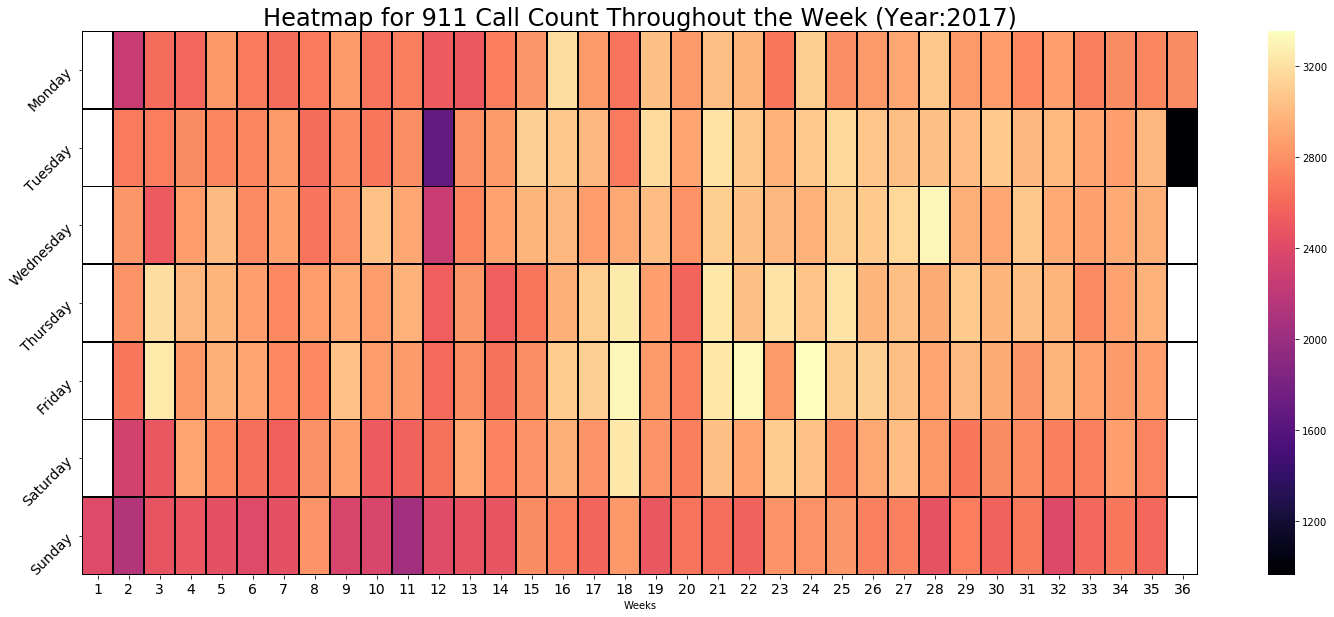

In [8]:
weekHeatmap(2017) 

# Big Question 2: How is 911 generally being used by the populace?

In [2]:
dataB=pd.read_csv("911_calls_for_service.csv")

## Sub-Question 1: What is the distribution of priority? (non-emergency, low, medium, high)

Created a list of the priority column , converted to pandas series and carried out a value count. This gives us exactly how the priority distribution is. The medium priorty is the highest.

NB: The no voice calls are medium priority as well.

Medium            1399431
Low                636380
High               434022
Non-Emergency      321619
Emergency            1004
Out of Service        803
dtype: int64


Text(0.5,1,'Priority Distribution')

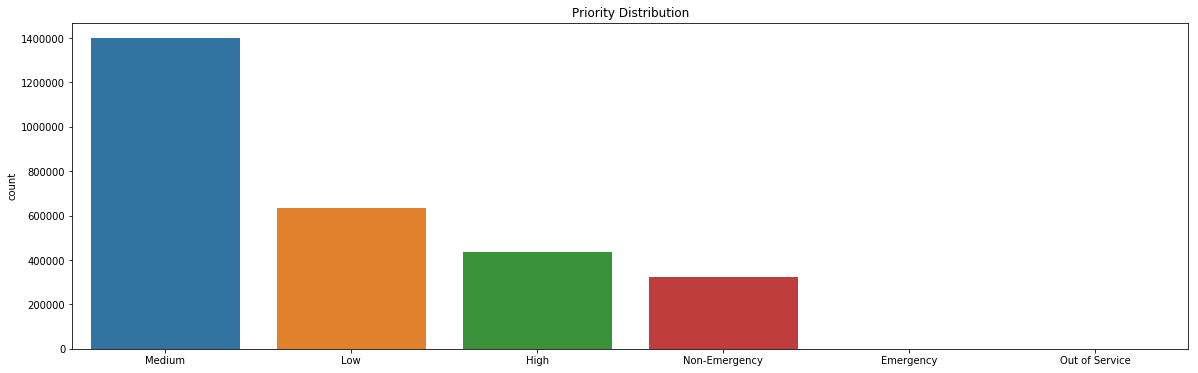

In [3]:
pr=dataB.priority.tolist()
prM=pd.Series(pr).value_counts()
print(prM)
f=plt.figure(figsize=(20,6))
ax = sns.countplot(x=pr, order=prM.index)
ax.set_title('Priority Distribution')

## Sub-Question 2: What are the most common reasons for calling 911?
We create lists of the the columns we need, convert it to series to get the value counts and get the top 20. 
    
    This will give us the top 20 reasons for calling 911. 
    NO VOICE calls being the highest reason for calling.

We use the countplot to plot the top 20 most popular resons for calling 911.

911/NO  VOICE       457475
DISORDERLY          238913
Traffic Stop        167911
COMMON ASSAULT      119659
AUTO ACCIDENT       109821
NARCOTICSOutside     95939
SILENT ALARM         78706
FAMILY DISTURB       68354
Repairs/Service      67050
OTHER                61879
BURGLARY             56665
INVESTIGATE          56549
HIT AND RUN          50992
SUSPICIOUS PERS      35269
Field Interview      34562
911/No Voice         32233
Lab Request          31703
LARCENY F/AUTO       31071
Other                29619
LARCENCY             29086
dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

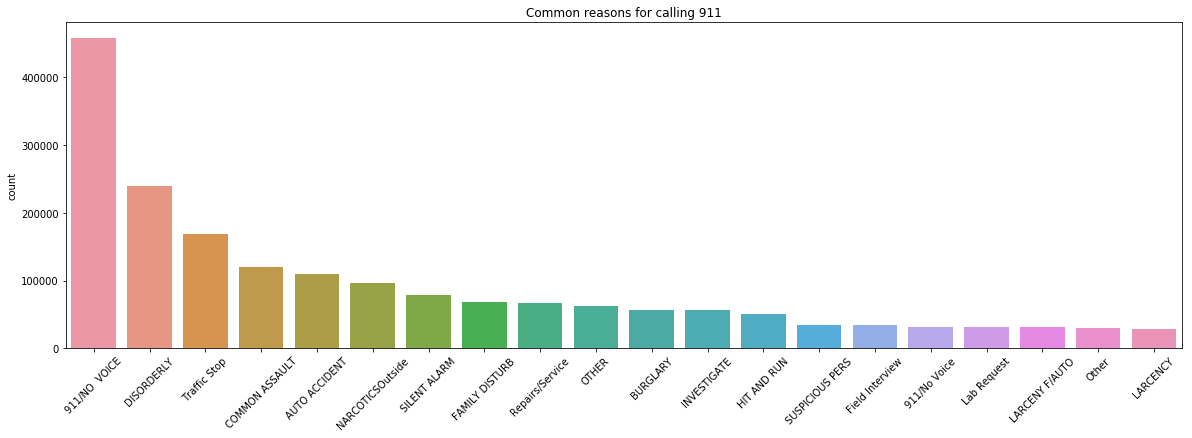

In [4]:
des=dataB.description.tolist()
prio=dataB.priority.tolist()
modes=pd.Series(des).value_counts()
m=modes.iloc[:20]
modes.to_csv(path="callReasons.csv", sep="\t")
print (modes[:20])
f=plt.figure(figsize=(20,6))
ax = sns.countplot(x=des, order=m.index)
ax.set_title('Common reasons for calling 911')
plt.xticks(rotation=45)

## Sub-Question 3: What percentage of calls are non-emergency calls, hangup calls, and no voice calls?
Created a list of all non emergency calls (No voice, hang-up and Non-Emergency) , calculated their total and the percentage. This will give us a clear picture of what perecentage of the data is non-emergency or calls with no voice/hang-up

In [5]:
NoVoice = [emergency for emergency in des if emergency == '911/NO  VOICE' ]
NoVoice2 = [emergency for emergency in des if emergency == '911/No Voice' ]
HangUp = [emergency for emergency in des if emergency == '911/HANGUP' ]
NonEm=[emergency for emergency in prio if emergency == 'Non-Emergency' ]
Total = len(NoVoice) + len(NonEm) + len(NoVoice2) + len(HangUp)
print(str(Total) + " of calls were non-emergency or calls with no voice/hang-up")
print(str(round(100*Total/len(dataB),2)) + "% of calls were non-emergency or calls with no voice/hang-up")

815500 of calls were non-emergency or calls with no voice/hang-up
29.13% of calls were non-emergency or calls with no voice/hang-up


### Sub-Question 3 Sub-Sub-Question:
How many man hours are wasted each year as a result of those calls?

In [33]:
print(str(Total) + " minutes")
print(str(round(Total/60)) + "  hours")
print(str(round(Total/60/8)) + "   workdays")
print(str(round(Total/60/8/(32/12))) + "    workdays per year")
print(str(round(Total/60/8/(32/12)/(52*5),2)) + "   worker years each year")


815500 minutes
13592  hours
1699   workdays
637    workdays per year
2.45   worker years each year


## Big Question 3: How are 911 calls distributed geographically?

Loading into a dataframe:

In [3]:
df =  pd.read_csv(r"911_calls_for_service.csv",index_col=None, header=0)

### Sub-Question 1: Where are 911 calls most concentrated?
Cleaning data, loading cleaned data into a dataframe, then generating a heatmap:

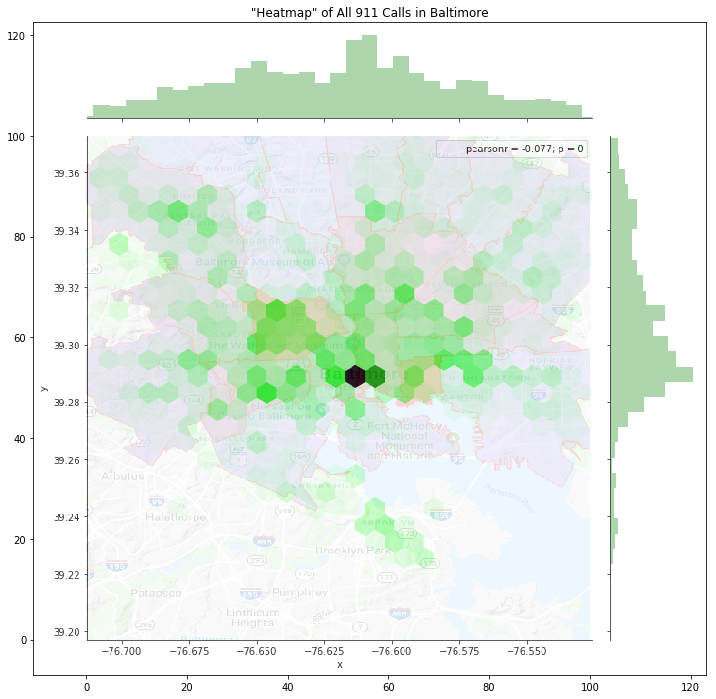

In [95]:
y = []
rgx = re.compile(r'39\.[1-3][0-9]*')
for i in range(len(df['location'])):
    m = re.search(rgx, df['location'][i])
    if m:
        y.append(float(m.group(0)))
    else:
        y.append(float(0))
        
rgx = re.compile(r'-76\.[5-7][0-9]*')        
x = []
for i in range(len(df['location'])):
    m = re.search(rgx, df['location'][i])
    if m:
        x.append(float(m.group(0)))
    else:
        x.append(float(0))
        
df2 = pd.DataFrame({
    'x' : x,
    'y' : y
})
df3 = df2[(df2 != 0).all(1)]

g = sns.jointplot(df3['x'],df3['y'], kind='hex', color="g", ylim=(39.197,39.373), 
                  xlim=(-76.713,-76.526), gridsize = 40, size=10, zorder=1, alpha=1.0)
g.savefig("jointPlot.png")
plt.close()

img = mpimg.imread("PopDenZip.png")
img2 = mpimg.imread("jointPlot.png")
fig = plt.figure()
w, h = fig.get_size_inches()
fig.set_size_inches(w * 3, h * 3)
plt.imshow(img, zorder=0, extent=[0,100, 0,100])
plt.imshow(img2, zorder=1, extent=[-10.5,123, -7,122.5], alpha=0.8)
plt.title(""" "Heatmap" of All 911 Calls in Baltimore """)
plt.savefig('jointOverlay.png')

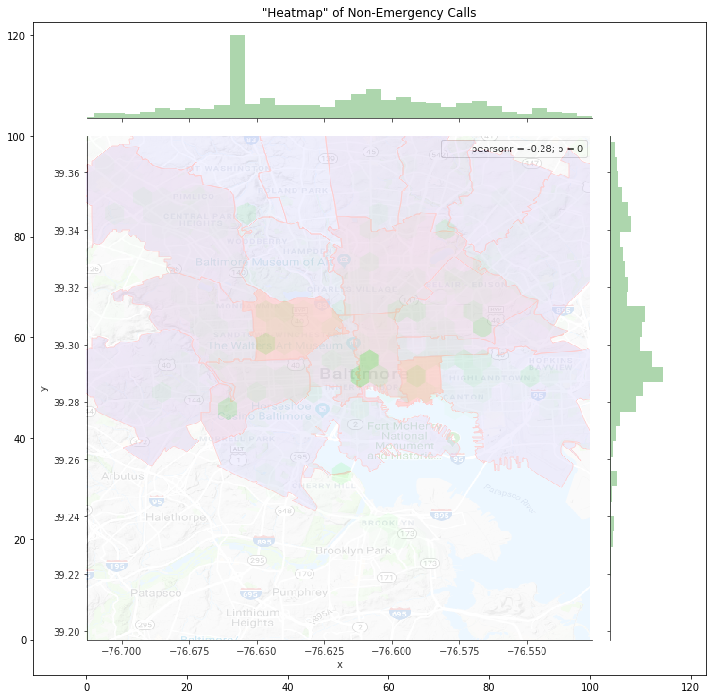

In [94]:
y = []
rgx = re.compile(r'39\.[1-3][0-9]*')
for i in range(len(df['location'])):
    if df['priority'][i] == 'Non-Emergency':
        m = re.search(rgx, df['location'][i])
        if m:
            y.append(float(m.group(0)))
        else:
            y.append(float(0))
            
x = []
rgx = re.compile(r'-76\.[5-7][0-9]*')        
for i in range(len(df['location'])):
    if df['priority'][i] == 'Non-Emergency':
        m = re.search(rgx, df['location'][i])
        if m:
            x.append(float(m.group(0)))
        else:
            x.append(float(0))

df2 = pd.DataFrame({
    'x' : x,
    'y' : y
})
df3 = df2[(df2 != 0).all(1)]

img = mpimg.imread("PopDenZip.png")

g = sns.jointplot(df3['x'],df3['y'], kind='hex', color="g", ylim=(39.197,39.373), 
                  xlim=(-76.713,-76.526), gridsize = 40, size=10, zorder=1, alpha=1.0)
g.savefig("jointPlotNE.png")
plt.close()

img2 = mpimg.imread("jointPlotNE.png")
fig = plt.figure()
w, h = fig.get_size_inches()
fig.set_size_inches(w * 3, h * 3)
plt.imshow(img, zorder=0, extent=[0,100, 0,100])
plt.imshow(img2, zorder=1, extent=[-10.5,123, -7,122.5], alpha=0.8)
plt.title(""" "Heatmap" of Non-Emergency Calls """)
plt.savefig('jointOverlayNE.png')

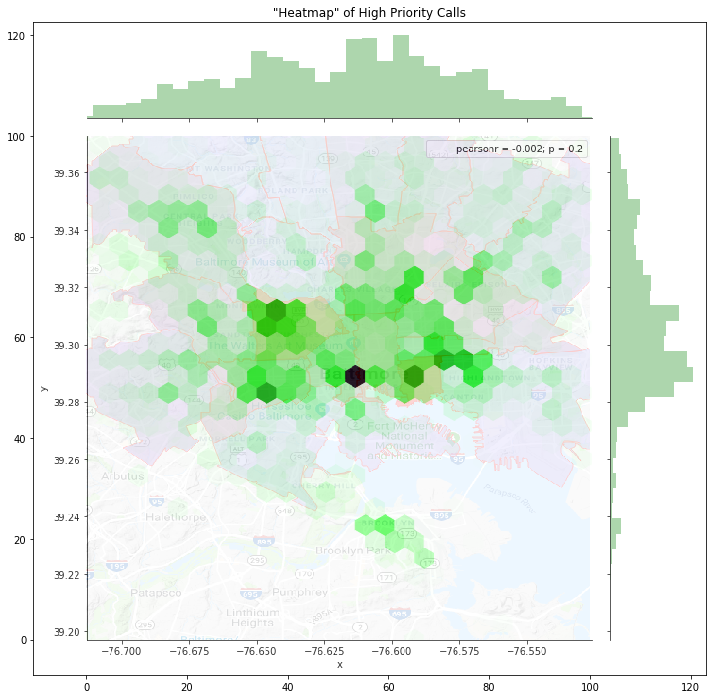

In [98]:
y = []
rgx = re.compile(r'39\.[1-3][0-9]*')
for i in range(len(df['location'])):
    if df['priority'][i] == 'High':
        m = re.search(rgx, df['location'][i])
        if m:
            y.append(float(m.group(0)))
        else:
            y.append(float(0))
        
rgx = re.compile(r'-76\.[5-7][0-9]*')        
x = []
for i in range(len(df['location'])):
    if df['priority'][i] == 'High':
        m = re.search(rgx, df['location'][i])
        if m:
            x.append(float(m.group(0)))
        else:
            x.append(float(0))
            
df2 = pd.DataFrame({
    'x' : x,
    'y' : y
})
df3 = df2[(df2 != 0).all(1)]

img = mpimg.imread("PopDenZip.png")

g = sns.jointplot(df3['x'],df3['y'], kind='hex', color="g", ylim=(39.197,39.373), 
                  xlim=(-76.713,-76.526), gridsize = 40, size=10, zorder=1, alpha=1.0)
g.savefig("jointPlotHigh.png")
plt.close()

img2 = mpimg.imread("jointPlotHigh.png")
fig = plt.figure()
w, h = fig.get_size_inches()
fig.set_size_inches(w * 3, h * 3)
plt.imshow(img, zorder=0, extent=[0,100, 0,100])
plt.imshow(img2, zorder=1, extent=[-10.5,123, -7,122.5], alpha=0.8)
plt.title(""" "Heatmap" of High Priority Calls """)
plt.savefig('jointOverlayHigh.png')

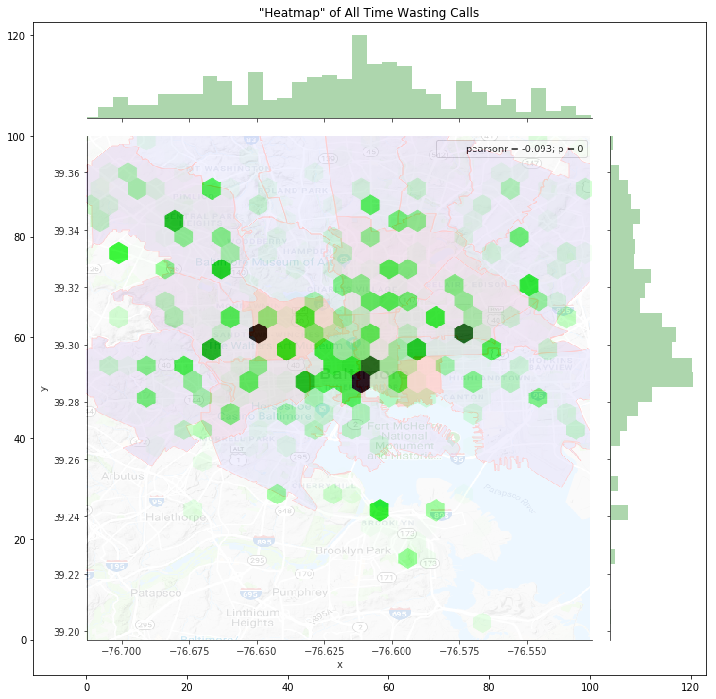

In [99]:
y = []
rgx = re.compile(r'39\.[1-3][0-9]*')
for i in range(len(df['location'])):
    if df['description'][i] == '911/NO  VOICE' or df['description'][i] == '911/No Voice' or df['description'][i] == '911/HANGUP':
        m = re.search(rgx, df['location'][i])
        if m:
            y.append(float(m.group(0)))
        else:
            y.append(float(0))
        
rgx = re.compile(r'-76\.[5-7][0-9]*')        
x = []
for i in range(len(df['location'])):
    if df['description'][i] == '911/NO  VOICE' or df['description'][i] == '911/No Voice' or df['description'][i] == '911/HANGUP':
        m = re.search(rgx, df['location'][i])
        if m:
            x.append(float(m.group(0)))
        else:
            x.append(float(0))
            
df2 = pd.DataFrame({
    'x' : x,
    'y' : y
})
df3 = df2[(df2 != 0).all(1)]

g = sns.jointplot(df3['x'],df3['y'], kind='hex', color="g", ylim=(39.197,39.373), 
                  xlim=(-76.713,-76.526), gridsize = 40, size=10, zorder=1, alpha=1.0)
g.savefig("jointPlotNV.png")
plt.close()

img2 = mpimg.imread("jointPlotNV.png")
fig = plt.figure()
w, h = fig.get_size_inches()
fig.set_size_inches(w * 3, h * 3)
plt.imshow(img, zorder=0, extent=[0,100, 0,100])
plt.imshow(img2, zorder=1, extent=[-10.5,123, -7,122.5], alpha=0.8)
plt.title(""" "Heatmap" of All Time Wasting Calls """)
plt.savefig('jointOverlayNV.png')

### Sub-Question 2: What are the most dangerous streets to be on?


In [19]:
streetsBad = []
for i in range(len(df)):
    if df['priority'][i] == 'High':
        streetsBad.append(df['incidentLocation'][i])
        
streetCount = {}
for street in streetsBad:
    street2 = street.split("/")
    for street in street2:
        street = re.sub("[0-9]", "", street)
        street = street.strip(" ")
        if street in streetCount:
            streetCount[street] += 1
        else:
            streetCount[street] = 1

sortStreet = sorted(streetCount.items(),key=itemgetter(1), reverse=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

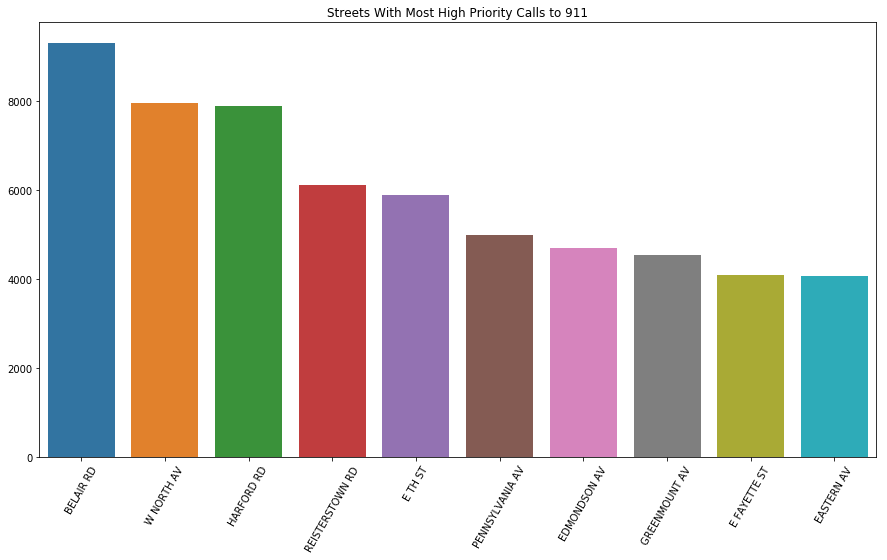

In [23]:
x=[]
y=[]
for i in range(10):
    x.append(sortStreet[i][0])
    y.append(sortStreet[i][1])
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.barplot(x,y)
ax.set_title('Streets With Most High Priority Calls to 911')
plt.xticks(rotation=60)

Stay away from Belair Road, kids.

In [3]:
des=dataB.description.tolist()
prio=dataB.priority.tolist()
modes=pd.Series(des).value_counts()
m=modes.iloc[-200:]
modes.to_csv(path="callReasons.csv", sep="\t")
print (modes[-200:])

INVISTIGATE         1
WELL BEING OTHER    1
*PEACE/PROT ORDE    1
*PRT ORDERS         1
INVS UNKNOWN        1
IRRATIC   DRIVER    1
READ TEXT.          1
*POL INFO           1
VOICES              1
CHECK ON WELBEIN    1
DOG BIT             1
POSS COMMN ASLT     1
UNKNONW TROUBLE.    1
KNOCK/NOTIFY        1
*TELE/THREATS       1
INEVESTIGATE        1
POCKET DIALING      1
ESCORT FOR BELO     1
POSS FLSE PRTNSE    1
DISABLE MOTORCYC    1
POSS/FORCE          1
*ATTENTED           1
NOISE CMPL          1
CALLER LATER        1
POSS FOR'D ENTRY    1
CHILD ENDANGERMT    1
*HEALTH CARE FA     1
CHECKCK WELL BEI    1
HARASSEMNT          1
FALSE CALLS         1
                   ..
FOLLOW UP  4E       1
PROPTECT ORDER      1
*HAZARD DRIVE       1
PROTY ORDER         1
PHONE HUNG-UP       1
TRAFFIC CONTOL      1
POSS 28             1
SEE TEX T           1
HEART PROBLEMS      1
FOLLOWING           1
DIABLES VEH         1
DISPUITE            1
56 MISSING PERSO    1
EMERGENCY PEPI      1
CHILDRN SC